###Name: William C Francis
###Penn Email: willcf@seas.upenn.edu

# Solution 1

##(a):

####Imports

In [1]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import torchvision as thv
train = thv.datasets.MNIST('./', download=True, train=True) 
val = thv.datasets.MNIST('./', download=True, train=False) 
print(train.data.shape, len(train.targets))

torch.Size([60000, 28, 28]) 60000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


####Getting the data ready

In [2]:
xtrain = train.data.numpy()
ytrain = train.targets.numpy()
xval = val.data.numpy()
yval = val.targets.numpy()
x,y,z = xtrain.shape
xtrain = xtrain.reshape(x, y*z)
x,y,z = xval.shape
xval = xval.reshape(x, y*z)
xtrain.shape, xval.shape

((60000, 784), (10000, 784))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


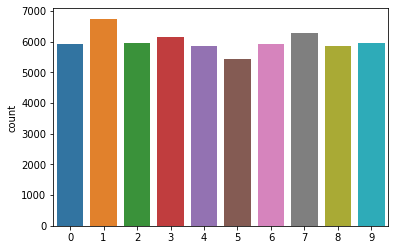

In [3]:
sns.countplot(ytrain)

In [4]:
xtrain, del1, ytrain, del2 = train_test_split(xtrain, ytrain, test_size = 0.5, stratify = ytrain, random_state = 10)
xval, del1, yval, del2 = train_test_split(xval, yval, test_size = 0.5, stratify = yval, random_state = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


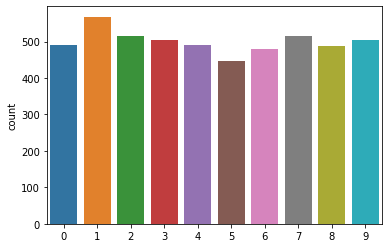

In [5]:
sns.countplot(yval)

####Plotting the images of a few randomly chosen images from training and validation set

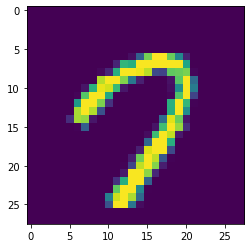

In [6]:
a = xtrain[randrange(30000)].reshape((28,28)) 
plt.imshow(a)

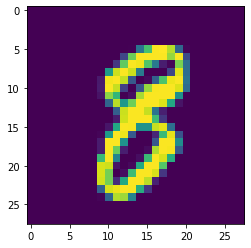

In [7]:
a = xval[randrange(5000)].reshape((28,28)) 
plt.imshow(a)

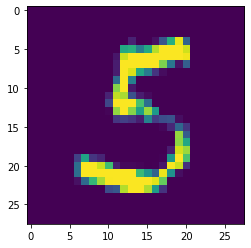

In [8]:
a = xtrain[randrange(30000)].reshape((28,28)) 
plt.imshow(a)

##(b):

In [9]:
class linear_t:

  def __init__(self, n_inp, n_out):
    self.w = np.random.normal(0,0.01,(n_inp, n_out))
    wnorm = np.linalg.norm(self.w)
    self.w = self.w/wnorm
    self.b = np.random.normal(0,0.01, (1, n_out))
    bnorm = np.linalg.norm(self.b)
    self.b = self.b/bnorm

  def forward(self, x_in): 
    self.x_in = x_in
    self.out = np.dot(x_in, self.w) + self.b
    return self.out

  def backward(self, h_l):
    self.dh_l = np.dot(h_l, self.w.T)
    dw = np.dot(self.x_in.T, h_l)
    db = np.sum(h_l, axis = 0, keepdims = True)
    self.dw, self.db = dw, db
    return self.dh_l

  def zero_grad(self):
    self.dw, self.db = 0*self.dw, 0*self.db

####Verifying if the Frobenius norm of w and b is 1

In [10]:
l1 = linear_t(xtrain.shape[1], 10)
l1out = l1.forward(xtrain)
print(np.sum(np.square(l1.b)))
print(np.sum(np.square(l1.w)))

1.0
0.9999999999999998


In [11]:
l1.w, l1.b

(array([[ 0.01647422,  0.01945549,  0.01708848, ...,  0.01086702,
         -0.00424439, -0.00434265],
        [-0.00971138,  0.00685448,  0.00862828, ...,  0.0048798 ,
         -0.00883935, -0.00652831],
        [-0.0015538 , -0.00690986, -0.01363032, ..., -0.00204565,
          0.00255901,  0.01896227],
        ...,
        [-0.01562262,  0.03675258,  0.00106002, ...,  0.00837255,
         -0.00225184,  0.0048286 ],
        [-0.00487112,  0.00783288,  0.01870232, ..., -0.01993549,
          0.00889146, -0.03062801],
        [ 0.0331423 , -0.00708408, -0.00364092, ..., -0.00895797,
         -0.00865449,  0.01079095]]),
 array([[ 0.18045177, -0.06584693,  0.26491128,  0.11171044, -0.5104029 ,
          0.39281225,  0.64495709,  0.17866764,  0.02430201, -0.13095489]]))

##(c):

In [12]:
class relu_t:
  # def __init__(self, x_in):
  #     self.input = x_in
  def forward(self, x_in):
      self.x_in = x_in
      self.out = np.maximum(0, x_in)
      return self.out

  def backward(self, h_l):
      self.dh_l = h_l.copy()
      self.dh_l[self.x_in<=0] = 0
      return self.dh_l

In [13]:
activrel = relu_t()
print(activrel.forward(l1out).shape)
activrel.forward(l1out)

(30000, 10)


array([[54.57555042, 12.66048982,  0.        , ...,  0.        ,
        21.24228614, 26.68577161],
       [27.54784252, 34.88655671, 10.41978883, ...,  0.        ,
         3.23463423,  0.        ],
       [ 0.        , 40.65883794, 45.72468858, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [28.23816674, 35.80263538, 29.78427153, ...,  6.03204404,
         0.        ,  0.        ],
       [ 0.        ,  4.38480917,  0.        , ...,  0.        ,
         9.52518916,  0.        ],
       [ 0.        ,  1.80612539,  0.        , ...,  0.55310347,
        17.9930497 , 21.88777017]])

##(d): 

####Softmax cross entropy

In [14]:
class softmax_cross_entropy_t: 

  def forward(self, x_in, y_true): 
    exp = np.exp(x_in - np.max(x_in, axis=1, keepdims=True))
    out = exp/np.sum(exp, axis=1, keepdims=True)
    self.out = out
    self.y_true = y_true
    ny = len(out)
    y_pred2 = np.clip(out, 1e-7, 1-1e-7)
    correctprob = y_pred2[range(ny), y_true]
    logl = -np.log(correctprob)
    ell = np.mean(logl)

    predictions = np.argmax(out, axis=1)
    accuracy = 100*np.mean(predictions == y_true)
    error = 100-accuracy
    return ell, error

  def backward(self):

    ny = len(self.out)
    self.dh_l = self.out.copy()
    self.dh_l[range(ny),self.y_true]-=1
    self.dh_l = self.dh_l/ny
    return self.dh_l

##(e):

####Checking forward propagation

In [15]:
l1 = linear_t(xtrain.shape[1], 10)
out = l1.forward(xtrain[0])
x = xtrain[0]
print(out)

[[ 54.50597773  -3.01638654  87.40582439 -27.38428493 -18.24263338
   58.96797529 -11.05028978  17.35701006 -43.70799736  75.27821642]]


In [16]:
w = l1.w
b = l1.b[0]
x = xtrain[0]
out1 = np.dot(x, w) + b
print(out1)
if((out==out1).all()):
  print("\nForward Prop Verified Succesfully!")
else:
  print("\nForward Prop Not Verified!")

[ 54.50597773  -3.01638654  87.40582439 -27.38428493 -18.24263338
  58.96797529 -11.05028978  17.35701006 -43.70799736  75.27821642]

Forward Prop Verified Succesfully!


####Checking Back Propagation

In [17]:
def check(n_out, out_error, l1outb, l1):
  yesdw=0; yesdb=0; yesh=0
  for i in range(10):   #10 randomly chosen elements of W
    eps1 = np.zeros((784, n_out))
    x = np.random.randint(784)
    y = np.random.randint(n_out)
    eps1[x][y] += np.random.randn()
    gradient1 = (np.dot(np.dot(xtrain[:1], l1.w+eps1), out_error.T) - np.dot(np.dot(xtrain[:1], l1.w-eps1), out_error.T))/(2*np.sum(eps1))
    if(np.abs(gradient1[0,0] == l1.dw[x,y])): 
      yesdw+=1

    eps3 = np.zeros((1, 784))
    x = np.random.randint(1)
    y = np.random.randint(784)
    eps3[x, y] += np.random.randn()
    gradient3 = (np.dot(np.dot(xtrain[:1]+eps3, l1.w), out_error.T) - np.dot(np.dot(xtrain[:1]-eps3, l1.w), out_error.T))/(2*np.sum(eps3))
    if(np.abs(gradient3[0,0] - l1outb[x,y])<0.1): 
      yesh+=1

  if(yesdw==10 and yesh==10):
    print("Backward Prop Verified Successfully!")



In [18]:
for i in range(5):    
  n_out = np.random.randint(100)
  out_error = np.zeros(n_out)
  random = np.random.randint(n_out)
  out_error[random] = 1
  out_error = out_error.reshape(1,-1)
  l1 = linear_t(784, n_out)
  l1out = l1.forward(xtrain[:1]) 
  l1outb = l1.backward(out_error) 
  check(n_out, out_error, l1outb, l1)

Backward Prop Verified Successfully!
Backward Prop Verified Successfully!
Backward Prop Verified Successfully!
Backward Prop Verified Successfully!
Backward Prop Verified Successfully!


##(g):
####Validation function

In [19]:
def validate():
  ellfull = []
  errorfull = []
  loss, tot_error = 0, 0
  for i in range(0, 5000, 32):
    x, y = xval[i:i+32], yval[i:i+32] 
    l1out = l1.forward(x) 
    relout = rel.forward(l1out)
    l2out = l2.forward(relout)
    ell, error = smce.forward(l2out, y)
    ellfull = np.append(ellfull, ell)
    errorfull = np.append(errorfull,error)
  print("VALIDATION------------------------> Validation Loss: ",np.mean(ellfull),"    Validation Error: ", np.mean(errorfull),"%")
  return np.mean(ellfull), np.mean(errorfull)

####Training the Neural Network

##(f):


In [20]:
ellfull=[]
errorfull=[]
ellvalfull=[]
errorvalfull=[]
lr=0.0005
#Initializing all the layers
l1, rel, l2, smce = linear_t(784, 64), relu_t(), linear_t(64, 10), softmax_cross_entropy_t()
#Training for 10000 iterations
for t in range(10000):
  batch_size = 32
  idx = np.random.choice(xtrain.shape[0], batch_size, replace=False)
  x, y = xtrain[idx], ytrain[idx]
  if(t!=0):
    l1.zero_grad()
    l2.zero_grad()
  #forward pass
  l1out = l1.forward(x) 
  relout = rel.forward(l1out)
  l2out = l2.forward(relout)
  ell, error = smce.forward(l2out, y)
  if(t%1000==0):
    ellfull = np.append(ellfull, ell)
    errorfull = np.append(errorfull, error)
    ellval, errorval = validate()
    ellvalfull = np.append(ellvalfull,ellval)
    errorvalfull = np.append(errorvalfull, errorval)
  # backward pass
  smce.backward()
  l2.backward(smce.dh_l)
  rel.backward(l2.dh_l)
  l1.backward(rel.dh_l)
  # gathering backprop gradients
  dw1, db1 = l1.dw, l1.db
  dw2, db2 = l2.dw, l2.db
  # printing some quantities for logging
  # and debugging
  if(t%100==0):print(t+1, "Training Loss: ",ell,"    Training Error: ", error,"%")
  # 7. one step of SGD
  l1.w = l1.w - lr*dw1
  l1.b = l1.b - lr*db1
  l2.w = l2.w - lr*dw2
  l2.b = l2.b - lr*db2 



VALIDATION------------------------> Validation Loss:  3.9661216672137214     Validation Error:  87.63933121019109 %
1 Training Loss:  3.455555404471932     Training Error:  81.25 %
101 Training Loss:  0.7819649453474573     Training Error:  18.75 %
201 Training Loss:  0.33321642544456653     Training Error:  6.25 %
301 Training Loss:  0.1814755223261661     Training Error:  9.375 %
401 Training Loss:  0.23474540504494715     Training Error:  6.25 %
501 Training Loss:  0.32771297659200643     Training Error:  9.375 %
601 Training Loss:  0.1663318502292806     Training Error:  6.25 %
701 Training Loss:  0.4452137003561924     Training Error:  15.625 %
801 Training Loss:  0.21246393213387627     Training Error:  6.25 %
901 Training Loss:  0.03547604953903051     Training Error:  0.0 %
VALIDATION------------------------> Validation Loss:  0.1887299198167605     Validation Error:  5.931528662420382 %
1001 Training Loss:  0.30178519784599883     Training Error:  9.375 %
1101 Training Loss:  

####Plotting the Training Error and Loss

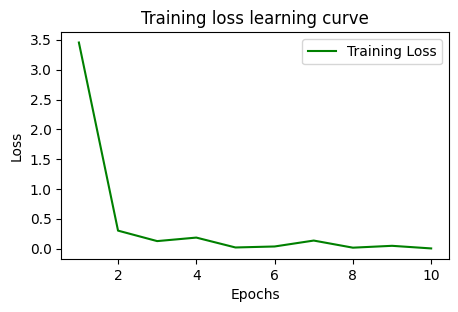

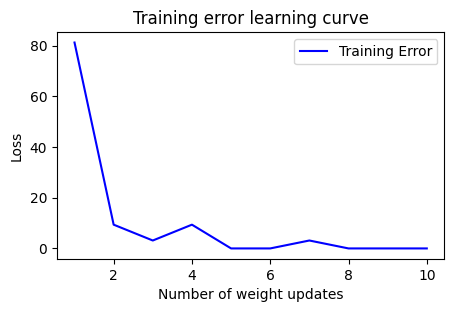

In [21]:
epochs = range(1, 11)
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, ellfull, 'g', label='Training Loss')
plt.title('Training loss learning curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, errorfull, 'b', label='Training Error')
plt.title('Training error learning curve')
plt.xlabel('Number of weight updates')
plt.ylabel('Loss')
plt.legend()
plt.show()

####Plotting the Validation Error and Loss

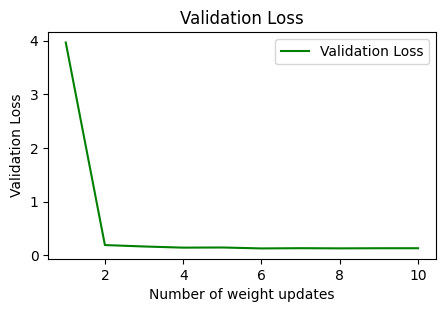

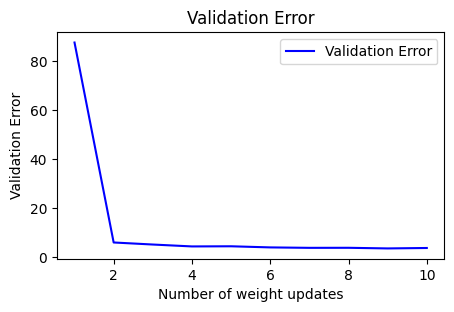

In [22]:
epochs = range(1, 11)
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, ellvalfull, 'g', label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Number of weight updates')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, errorvalfull, 'b', label='Validation Error')
plt.title('Validation Error')
plt.xlabel('Number of weight updates')
plt.ylabel('Validation Error')
plt.legend()
plt.show()

##(h):
####Creating a neural network in Pytorch

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as fns
from torch.utils.data import DataLoader
import torchvision.datasets as datasets 
import torchvision.transforms as transforms


####Creating the Neural network model

In [32]:
class Net(nn.Module):
    def __init__(self, n_inp, num_classes):
        super(Net, self).__init__()
        self.l1 = nn.Linear(n_inp, 64)
        self.l2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = fns.relu(self.l1(x))
        x = self.l2(x)
        out = fns.log_softmax(x, dim=1)
        return out


In [33]:
n_inp = 784
num_classes = 10
learning_rate = 0.002
net = Net(n_inp, num_classes)

In [34]:
smce = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
train_dataset = datasets.MNIST(train=True, transform=transforms.ToTensor(), root="dataset/", download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_dataset = datasets.MNIST(train=False, transform=transforms.ToTensor(), root="dataset/", download=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=True)

####Function to obtain validation loss and error

In [35]:
def validation():
  correct = 0
  net.eval()
  for x_in, target in val_loader:
      x_in = x_in.reshape(x_in.shape[0], -1) 
      out = net(x_in)
      loss=smce(out,targets)
      delete, pred = out.max(1)
      correct += (pred == target).sum()
  accuracy = correct / len(val_dataset) * 100
  error = 100-accuracy
  return error, loss

####Training the model

In [36]:
count = 0
valerr = []
valloss = []
trainloss = []
trainerr = []
correct = 0
for i in range(10):
  for data, targets in train_loader:
    count+=1
    data = data.reshape(data.shape[0], -1) 
    scores = net(data)
    loss = smce(scores, targets)
    delete, pred = scores.max(1)
    correct += (pred == targets).sum()
    if(count%50==0):
      valerror, ell = validation()
      lossnp = ell.detach().numpy()
      valerrornp = valerror.detach().numpy()
      valerr = np.append(valerr, valerrornp)
      valloss = np.append(valloss, lossnp)
      trainloss = np.append(trainloss, loss.detach().numpy())
      accuracy = correct / count * 100
      error = 100-accuracy
      trainerr = np.append(trainerr, error.detach().numpy())
      print(count, "  Training Loss : ", loss.item())
      print("Valdation Loss   :   ", lossnp, "------   Validation Error   :   ", valerrornp)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


50   Training Loss :  2.2900426387786865
Valdation Loss   :    2.3240373 ------   Validation Error   :    90.22
100   Training Loss :  2.307018280029297
Valdation Loss   :    2.3487368 ------   Validation Error   :    89.86
150   Training Loss :  2.3019912242889404
Valdation Loss   :    2.3425512 ------   Validation Error   :    88.16
200   Training Loss :  2.1969308853149414
Valdation Loss   :    2.2999065 ------   Validation Error   :    84.81
250   Training Loss :  2.236830472946167
Valdation Loss   :    2.3166988 ------   Validation Error   :    81.17
300   Training Loss :  2.231407642364502
Valdation Loss   :    2.2912343 ------   Validation Error   :    79.83
350   Training Loss :  2.1640584468841553
Valdation Loss   :    2.210433 ------   Validation Error   :    74.21
400   Training Loss :  2.129856586456299
Valdation Loss   :    2.2258382 ------   Validation Error   :    69.41
450   Training Loss :  2.162184000015259
Valdation Loss   :    2.3381236 ------   Validation Error   :

####Plotting the training error, training loss, validation error, and validation loss

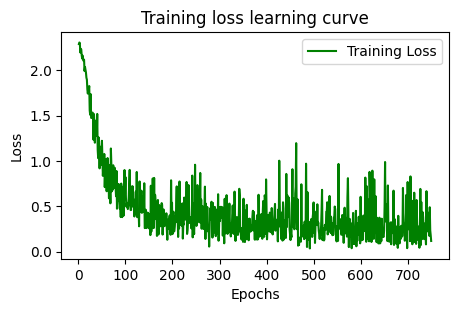

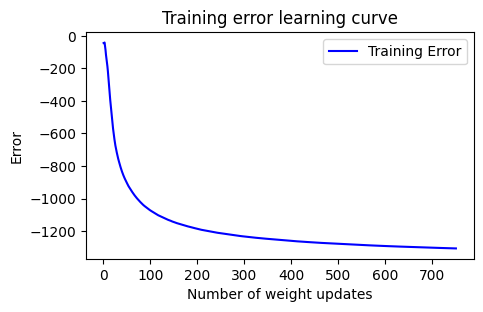

In [40]:
epochs = range(1, 751)
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, trainloss, 'g', label='Training Loss')
plt.title('Training loss learning curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, trainerr, 'b', label='Training Error')
plt.title('Training error learning curve')
plt.xlabel('Number of weight updates')
plt.ylabel('Error')
plt.legend()
plt.show()

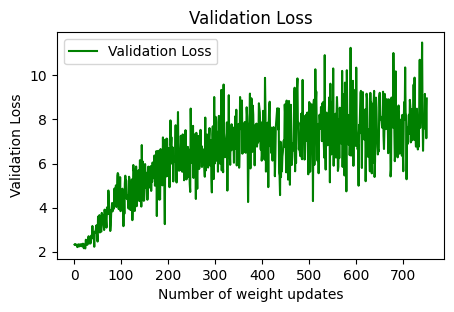

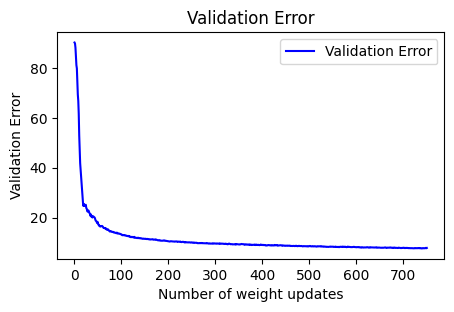

In [39]:
epochs = range(1, 751)
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, valloss, 'g', label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Number of weight updates')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
plt.figure(figsize=(5,3), dpi=100)
plt.plot(epochs, valerr, 'b', label='Validation Error')
plt.title('Validation Error')
plt.xlabel('Number of weight updates')
plt.ylabel('Validation Error')
plt.legend()
plt.show()

*Thank you!*